# Trabalho Final Cálculo Numérico



**NOMES: Caroline Souza Camargo, Jean Carlo Silva dos Santos e Yasmin Souza Camargo**

## Contextualização

Um vídeo é uma sequência de imagens em movimento, onde cada imagem é composta por pixels, que armazenam informações detalhadas sobre cor, intensidade luminosa, e outros atributos visuais. A quantidade de informações armazenadas em cada pixel é significativa, por exemplo, considerando um vídeo em HD (resolução de 1920x1080 pixels) que roda a 30 frames por segundo, seriam necessários armazenar os detalhes de 3.732.480.000 pixels por minuto de vídeo. Portanto, pode-se perceber que é inviável armazenar dados de vídeos dessa maneira.


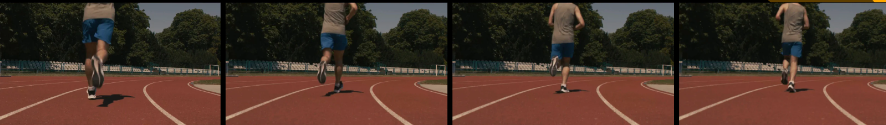





Devido a essa complexidade, são necessários codificadores de vídeo para comprimir e representar eficientemente esses dados, reduzindo o espaço de armazenamento e facilitando a transmissão pela internet. Esses codificadores aplicam diverssas técnicas e algoritmos para reduzir a quantidade de bits necessários para representar o vídeo. Na pesquisa, conduzimos experimentos e aplicamos técnicas com vídeos, visando reduzir o tempo durante as codificações.

Um dos parâmetros cruciais em nossos experimentos é o QP, que representa o nível de quantização aplicado durante a codificação de vídeo. Em outras palavras, o QP determina a quantidade de bits necessários para representar a informação visual. Esse parâmetro está diretamente relacionado ao tempo, uma vez que valores altos de QP resultam em maior quantização. Isso significa que mais detalhes desse vídeo serão perdidos e, consequentemente, uma qualidade visual reduzida. Assim, a codificação com QP alto geralmente demanda menos bits, o que pode resultar em um tempo menor, já que menos esforço computacional será gasto para codificar esse vídeo.

Esse comportamento pode ser observado na tabela a seguir:

\begin{array}{c|cc}
    \text{QP} & \text{Tempo de Execução (s)} \\
    \hline
    22 & 152737.193  \\
    27 & 76626.425  \\
    32 & 49530.841  \\
    37 & 29775.422  \\
\end{array}



Percebe-se que nesse experimento que ao aumentar o QP (menos qualidade no vídeo final) menor é o tempo. Em cenários em que a prioridade é uma codificação rápida, por exemplo, chamadas ao vivo, optar por valores mais altos de QP pode ser uma estratégia viável. Entretanto, é vital considerar as necessidades específicas, pois a escolha de um QP mais alto implica em comprometer a qualidade visual. Em situações em que a qualidade é prioritária, é necessário buscar um equilíbrio entre o QP e o tempo de execução, ajustando os parâmetros conforme as metas e requisitos específicos de cada aplicação.

Outro ponto interessante de se observar é que foram testados e codificados 4 valores de QP, isso acontece devido a questões de limitação de tempo de pesquisa (cada vídeo tem um tempo considerável alto para codificar) e também porque nas condições comuns de teste (CTC) dos codificadores são definidos quais QPs a academia deve realizar experimentos. Isso para obter um consenso e permitir comparações entre os pesquisadores.
Embora essa abordagem padronizada seja valiosa para garantir a replicabilidade e a comparabilidade dos resultados, é importante destacar que a investigação de um espectro mais amplo de valores de QP pode enriquecer as análises. Ao expandir a variedade de QPs testados, é possível obter estimativas mais precisas do tempo de codificação em diferentes cenários. Assim, quanto mais dados dados obtidos melhor é o resultado final, uma vez que a análise será mais abrangente e completa.


## Método de Interpolação

Um método de interpolação é uma técnica matemática empregada para estimar valores desconhecidos dentro de um conjunto de dados conhecidos. Nesse sentido, propomos como trabalho final da disciplina a utilização da interpolação para prever valores intermediários (QPs 15, 25, 30, 35 e 40) entre aqueles usados por padrão (QPs 22, 27, 32 e 37). O método de interpolação escolhido para este trabalho é o de Newton, devido à sua reconhecida eficiência computacional e precisão. Esse método se fundamenta na utilização de diferenças divididas para determinar os coeficientes do polinômio interpolador.

Posteriormente, vamos realizar a codificação efetiva dos valores intermediários para determinar os valores reais e testar a eficiência dos métodos de interpolação.

Abaixo segue a impementação do método, que foi realizado durante as aulas de cálculo numérico computacional.

#### Método de Newton

In [ ]:
def newton(m, x, y, z):
    print('\n=== NEWTON ===')
    dely = []

    for i in range(0, m):
        dely.append(y[i])

    # construção das diferenças divididas
    polinomio = str(dely[0])
    for i in range(1, m): # 1 - 5
        for k in range(m-1, i-1, -1): # 4 - 0
            dely[k] = (dely[k] - dely[k-1]) / (x[k] - x[k-i])

        termo = str(dely[i])
        for j in range(i):
            termo += " * (x - {})".format(x[j])
        polinomio += " + " + termo

    print("P(x) =", polinomio)

    # Avaliação do polinômio pelo método de Horner
    pz = dely[m-1]
    for i in range(m-2, -1, -1):
        pz = pz * (z - x[i]) + dely[i]

    print (f'=> Valor interpolado: {pz}')

É importante ressaltar que os valores de x (QP) e y (Tempo de Execução) representam resultados reais obtidos por meio de simulações no codificador de vídeo VVC. A seguir, apresentamos as execuções para prever valores intermediários (QP 15, 25, 30, 35, 40) com base nas condições comuns de teste (QP 22, 27, 32, 37). Essas previsões pode ser interessantes, por exemplo, para entender o desempenho do codificador em uma gama mais ampla de condições e cenários de uso.

In [ ]:
QP = [22, 27, 32, 37]
tempo_execucao = [152737.193, 76626.425, 49530.841, 29775.422]
n = 4

f = newton(n, QP, tempo_execucao, 15)
f = newton(n, QP, tempo_execucao, 25)
f = newton(n, QP, tempo_execucao, 30)
f = newton(n, QP, tempo_execucao, 35)
f = newton(n, QP, tempo_execucao, 40)



=== NEWTON ===
P(x) = 152737.193 + -15222.1536 * (x - 22) + 980.3036799999998 * (x - 22) * (x - 27) + -55.56669199999998 * (x - 22) * (x - 27) * (x - 32)
=> Valor interpolado: 420987.01349599997

=== NEWTON ===
P(x) = 152737.193 + -15222.1536 * (x - 22) + 980.3036799999998 * (x - 22) * (x - 27) + -55.56669199999998 * (x - 22) * (x - 27) * (x - 32)
=> Valor interpolado: 98855.10905600002

=== NEWTON ===
P(x) = 152737.193 + -15222.1536 * (x - 22) + 980.3036799999998 * (x - 22) * (x - 27) + -55.56669199999998 * (x - 22) * (x - 27) * (x - 32)
=> Valor interpolado: 57154.453735999996

=== NEWTON ===
P(x) = 152737.193 + -15222.1536 * (x - 22) + 980.3036799999998 * (x - 22) * (x - 27) + -55.56669199999998 * (x - 22) * (x - 27) * (x - 32)
=> Valor interpolado: 39463.97101599997

=== NEWTON ===
P(x) = 152737.193 + -15222.1536 * (x - 22) + 980.3036799999998 * (x - 22) * (x - 27) + -55.56669199999998 * (x - 22) * (x - 27) * (x - 32)
=> Valor interpolado: 4108.641895999957


\begin{array}{c|cc}
    \text{QP} & \text{Tempo de Execução (s)} & \text{Horas}\\
    \hline
    15 & 420987.013 & 116,94 \\
    22 & 152737.193 & 42,43 \\
    25 & 98855.109 & 27,45 \\
    27 & 76626.425 & 21,28 \\
    30 & 57154.453 & 15,87 \\
    32 & 49530.841 & 13,76 \\
    35 & 39463.971 & 10,96 \\
    37 & 29775.422 & 8,27 \\
    40 & 4108.641 & 1,14 \\
\end{array}

Observando a tabela de resultados, fica evidente que os valores encontrados pelos métodos seguem o comportamento esperado, onde à medida que aumentamos o QP, observamos uma diminuição gradual no tempo de execução.

A seguir, apresentaremos os resultados obtidos ao executar efetivamente esses valores de QP no codec de vídeo VVC.

### Codificação efetiva
A seguir são apresentados alguns detalhes técnicos das simulações realizadas:

---

O nome do vídeo utilizado no experimento foi: Campfire_3840x2160_30fps_bt709_420_videoRange, pertencente a classe A das condições de teste, ou seja, um vídeo de resolução 3840x2160 (4k). Abaixo segue mais algumas características:

*   InputBitDepth: 10          (Profundidade de bits)
*   InputChromaFormat: 420     (Subamostragem)
*   FrameRate: 30              (Taxa de quadros por segundo)
*   FramesToBeEncoded: 300     (Número de quadros a serem codificados)

O software de referência utilizado foi o VTM na versão 23.0 (código hash: '8fc967'). A quantidade de quadros executado para cada vídeo foi 60 e o arquivo de configuração foi o randomacces.

Já as configurações do computador utilizado foram as seguintes:
*  Intel(R) Core(TM) i7-8700 CPU @ 3.20GHz
*  Memória RAM disponível 15.5G

Vale ressaltar que cada configuração de vídeo foi executado em um núcleo separadamente.

---

Os resultados obtidos nas simulações do codificador de vídeo foram os seguintes:


\begin{array}{c|cc}
    \text{QP} & \text{Tempo de Execução (s)} & \text{Horas}\\
    \hline
    15 & 271294.25  &75,36 \\
    22 & 152737.193 &42,43 \\
    25 & 97844.524  &27,18 \\
    27 & 76626.425  &21,28 \\
    30 & 59952.289  &16,65 \\
    32 & 49530.841  &13,76 \\
    35 & 37545.265  &10,43 \\
    37 & 29775.422  &8,27  \\
    40 & 20330.427  &5,65  \\
\end{array}


Ao comparar os resultados obtidos pelo método de Newton com os valores reais, é evidente que, em geral, o método encontrou valores próximos, principalmente para os QPs 25, 30 e 35, indicando uma melhor precisão nessa faixa de interpolação. Vale destacar que em experimentos computacionais, as diferenças no tempo de execução podem ocorrer devido à carga de processamento do sistema, concorrência por recursos, tempo de acesso a recursos externos e condições do hardware. Essas pequenas variações são comuns devido à natureza dos sistemas computacionais em que outras tarefas estão sendo executadas paralelamente.

No entanto, nos valores mais extremos para os QPs 15 e 40, a diferença a diferença encontrada pelo método de Newton entre o valor real e o calculado é mais significativa. Esses resultados ressaltam a importância de considerar a faixa de interpolação do método escolhido, especialmente ao extrapolar para além dos dados conhecidos.